<a href="https://colab.research.google.com/github/ash11sh/co-learning-lounge/blob/patch-5/Technology/Artificial%20Intelligence/Computer%20Vision/Concepts/image_segmentation/mmdetection-toolbox/mmdet_installation%2Btraining%2Bdemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/open-mmlab/mmdetection.git



Cloning into 'mmdetection'...
remote: Enumerating objects: 5095, done.
remote: Total 5095 (delta 0), reused 0 (delta 0), pack-reused 5095
Receiving objects: 100% (5095/5095), 4.95 MiB | 3.82 MiB/s, done.
Resolving deltas: 100% (3414/3414), done.


In [0]:
cd mmdetection

## REQUIREMENTS

In [0]:
!pip install -q mmcv terminaltables
!pip install mmcv>=0.2.10
!pip install imagecorruptions


## INSTALLING OPEN-MMLAB  // MMDETECTION

In [0]:
!python setup.py develop

## DEFINING MODEL CONFIGS

In [0]:
# You can add more model configs like below.
MODELS_CONFIG = {
    'mask_rcnn_r50_fpn_1x': {
        'config_file': 'mmdetection/configs/mask_rcnn_r50_fpn_1x.py'
    },
    'cascade_mask_rcnn_r50_fpn_1x': {
        'config_file': 'mmdetection/configs/cascade_mask_rcnn_r50_fpn_1x.py',
    }
}

## YOUR SETTINGS

In [0]:


# Pick the model you want to use
# Select a model in `MODELS_CONFIG`.
selected_model = 'cascade_mask_rcnn_r50_fpn_1x' # 'mask_rcnn_r50_fpn_1x'  

# Total training epochs.
total_epochs = 60

# Name of the config file.
config_file = MODELS_CONFIG[selected_model]['config_file']

In [0]:
ls

'=0.2.10'   demo/     LICENSE           README.md          tests/
 build/     docker/   mmdet/            requirements.txt   tools/
 configs/   docs/     mmdet.egg-info/   setup.py


In [0]:
cd ..

/content


## DATASET PREPARATION

In [0]:
cd mmdetection/

/content/mmdetection


* Make directory named "data/images"
* upload your images to the "data/images" folder 
* upload your annotation file (single json file) to the "data" folder

In [0]:
!mkdir data


In [0]:
cp -r '/content/drive/My Drive/images'  '/content/mmdetection/data/'

## MODIFY CONFIG FILE

In [0]:
import os
config_fname = os.path.join(config_file)

assert os.path.isfile(config_fname), '`{}` not exist'.format(config_fname)
config_fname

'mmdetection/configs/cascade_mask_rcnn_r50_fpn_1x.py'

In [0]:
import json
annotation_path = os.path.join( "data", "trainval.json")
json_file = open(annotation_path)
coco = json.load(json_file)
print(coco["categories"])
classes_names = [category["name"] for category in coco["categories"]]
print(classes_names)

[{'supercategory': 'rabbit', 'id': 0, 'name': 'rabbit'}]
['rabbit']


In [0]:
cd ..

/content


In [0]:
import re
fname = config_fname
with open(fname) as f:
    s = f.read()
    work_dir = re.findall(r"work_dir = \'(.*?)\'", s)[0]
    # Update `num_classes` including `background` class.
    s = re.sub('num_classes=.*?,',
               'num_classes={},'.format(len(classes_names) + 1), s)
    s = re.sub('total_epochs = \d+',
               'total_epochs = {} #'.format(total_epochs), s)
    if "CocoDataset" in s:
        s = re.sub("data_root = 'data/coco/'",
                   "data_root = 'data/'", s)
        s = re.sub("annotations/instances_train2017.json",
                   "trainval.json", s)
        s = re.sub("annotations/instances_val2017.json",
                   "trainval.json", s)
        s = re.sub("annotations/instances_val2017.json",
                   "trainval.json", s)
        s = re.sub("train2017", "images", s)
        s = re.sub("val2017", "images", s)
    else:
        s = re.sub('img_prefix=.*?\],',
                   "img_prefix=data_root + 'images',".format(total_epochs), s)
with open(fname, 'w') as f:
    f.write(s)
!cat {config_fname}

In [0]:
cd mmdetection/

/content/mmdetection


# TRAINING

In [0]:
!python tools/train.py configs/cascade_mask_rcnn_r50_fpn_1x.py

## VERIFY CHECKPOINT FILE EXISTS

In [0]:
checkpoint_file = os.path.join(work_dir, "epoch_47.pth")
assert os.path.isfile(
    checkpoint_file), '`{}` not exist'.format(checkpoint_file)
checkpoint_file = os.path.abspath(checkpoint_file)
checkpoint_file

'/content/mmdetection/work_dirs/cascade_mask_rcnn_r50_fpn_1x/epoch_47.pth'

## TEST IMAGE

TWEAK SCORE_THRESHOLD TO GET REQUIRED OUTPUT

In [0]:
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

import mmcv
from mmcv.runner import load_checkpoint
import mmcv.visualization.image as mmcv_image
# fix for colab


def imshow(img, win_name='', wait_time=0): plt.figure(
    figsize=(50, 50)); plt.imshow(img)


mmcv_image.imshow = imshow
from mmdet.models import build_detector
from mmdet.apis import inference_detector, show_result, init_detector

In [0]:
cd ..

/content


In [0]:
 score_thr = 0.9

# build the model from a config file and a checkpoint file
model = init_detector(config_fname, checkpoint_file)

# test a single image and show the results
img = '/content/images (2).jpeg'

result = inference_detector(model, img)
show_result(img, result, classes_names,
            score_thr=score_thr, out_file="result.jpg")

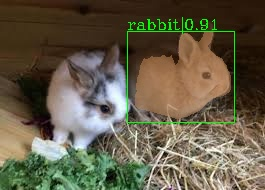

In [0]:
from IPython.display import Image
Image(filename='result.jpg')

## Download checkpoint file.

### Option1 : upload the checkpoint file to your Google Drive
Then download it from your Google Drive to local file system.

During this step, you will be prompted to enter the token.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp {checkpoint_file} /content/drive

### Option2 :  Download the checkpoint file directly to your local file system
This method may not be stable when downloading large files like the model checkpoint file. Try **option 1** instead if not working.

In [0]:
from google.colab import files
files.download(checkpoint_file)